In [ ]:
# install.packages("rpart.plot")
# install.packages("rpart")

library(rpart)
library(rpart.plot)

In [ ]:
# import the data Credit_Data.csv
credit<-read.csv("Credit_Data.csv", stringsAsFactors = FALSE)
str(credit)

'data.frame':	1000 obs. of  21 variables:
 $ default                   : int  0 1 0 0 1 0 0 0 0 1 ...
 $ account_check_status      : chr  "< 0 DM" "0 <= ... < 200 DM" "no checking account" "< 0 DM" ...
 $ duration_in_month         : int  6 48 12 42 24 36 24 36 12 30 ...
 $ credit_history            : chr  "critical account/ other credits existing (not at this bank)" "existing credits paid back duly till now" "critical account/ other credits existing (not at this bank)" "existing credits paid back duly till now" ...
 $ purpose                   : chr  "domestic appliances" "domestic appliances" "(vacation - does not exist?)" "radio/television" ...
 $ credit_amount             : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ savings                   : chr  "unknown/ no savings account" "... < 100 DM" "... < 100 DM" "... < 100 DM" ...
 $ present_emp_since         : chr  ".. >= 7 years" "1 <= ... < 4 years" "4 <= ... < 7 years" "4 <= ... < 7 years" ...
 $ installment_as_inc

In [ ]:
# randomizing the sample
credit_rand<-credit[order(runif(nrow(credit))),]
str(credit_rand)

'data.frame':	1000 obs. of  21 variables:
 $ default                   : int  0 1 0 0 1 0 1 0 0 1 ...
 $ account_check_status      : chr  "< 0 DM" "0 <= ... < 200 DM" "< 0 DM" "no checking account" ...
 $ duration_in_month         : int  18 48 6 6 12 14 18 12 12 18 ...
 $ credit_history            : chr  "no credits taken/ all credits paid back duly" "no credits taken/ all credits paid back duly" "existing credits paid back duly till now" "existing credits paid back duly till now" ...
 $ purpose                   : chr  "business" "business" "radio/television" "radio/television" ...
 $ credit_amount             : int  3104 3844 1374 2978 795 1410 2864 958 3617 2278 ...
 $ savings                   : chr  "... < 100 DM" "100 <= ... < 500 DM" "... < 100 DM" "500 <= ... < 1000 DM " ...
 $ present_emp_since         : chr  "4 <= ... < 7 years" "4 <= ... < 7 years" "1 <= ... < 4 years" "1 <= ... < 4 years" ...
 $ installment_as_income_perc: int  3 4 1 1 4 1 2 2 1 3 ...
 $ personal_status_sex

In [ ]:
# making the predicted variable a factor
credit_rand$default<-factor(credit_rand$default, levels=c(0,1), labels = c("No","Yes"))
str(credit_rand)

'data.frame':	1000 obs. of  21 variables:
 $ default                   : Factor w/ 2 levels "No","Yes": 1 2 1 1 2 1 2 1 1 2 ...
 $ account_check_status      : chr  "< 0 DM" "0 <= ... < 200 DM" "< 0 DM" "no checking account" ...
 $ duration_in_month         : int  18 48 6 6 12 14 18 12 12 18 ...
 $ credit_history            : chr  "no credits taken/ all credits paid back duly" "no credits taken/ all credits paid back duly" "existing credits paid back duly till now" "existing credits paid back duly till now" ...
 $ purpose                   : chr  "business" "business" "radio/television" "radio/television" ...
 $ credit_amount             : int  3104 3844 1374 2978 795 1410 2864 958 3617 2278 ...
 $ savings                   : chr  "... < 100 DM" "100 <= ... < 500 DM" "... < 100 DM" "500 <= ... < 1000 DM " ...
 $ present_emp_since         : chr  "4 <= ... < 7 years" "4 <= ... < 7 years" "1 <= ... < 4 years" "1 <= ... < 4 years" ...
 $ installment_as_income_perc: int  3 4 1 1 4 1 2 2 1 3 

In [ ]:
# Doing the decision tree model using rpart on the first 80% of the data
library(rpart)

credit_model<-rpart(default~housing+savings+age+account_check_status+duration_in_month+credit_history+purpose+credit_amount+present_emp_since+
installment_as_income_perc+personal_status_sex+other_debtors+present_res_since+property+other_installment_plans+
credits_this_bank+job+people_under_maintenance+telephone+foreign_worker, credit_rand[1:800,])
credit_model

n= 800 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

   1) root 800 237 No (0.70375000 0.29625000)  
     2) account_check_status=>= 200 DM / salary assignments for at least 1 year,no checking account 379  49 No (0.87071240 0.12928760) *
     3) account_check_status=< 0 DM,0 <= ... < 200 DM 421 188 No (0.55344418 0.44655582)  
       6) duration_in_month< 22.5 236  83 No (0.64830508 0.35169492)  
        12) credit_history=critical account/ other credits existing (not at this bank),delay in paying off in the past 73  12 No (0.83561644 0.16438356) *
        13) credit_history=all credits at this bank paid back duly,existing credits paid back duly till now,no credits taken/ all credits paid back duly 163  71 No (0.56441718 0.43558282)  
          26) other_debtors=co-applicant,guarantor 20   1 No (0.95000000 0.05000000) *
          27) other_debtors=none 143  70 No (0.51048951 0.48951049)  
            54) purpose=business,car (used),domestic appliances,education,

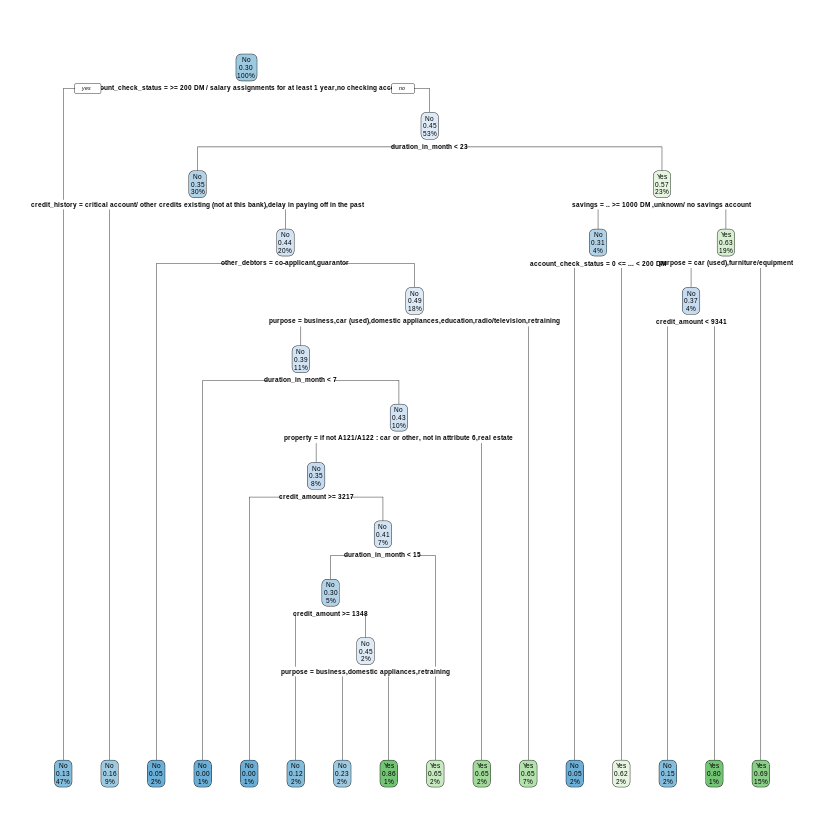

In [ ]:
library(rpart.plot)
rpart.plot(credit_model)

In [ ]:
# Finding the predicted values of the model
credit_pred<-predict(credit_model, credit_rand[801:1000,], type = c("class"))

In [ ]:
credit_pred

684  36 647 334 509 340 802  43 196 576 508 516 878 866 695 487 366 205  18 873 
 No Yes Yes  No  No  No  No  No  No  No Yes  No  No  No  No  No  No  No Yes Yes 
343 582   5 221 362 458 623 916 981 852 717 485  83 947  74  53 421 185 875 267 
Yes  No Yes  No  No Yes  No Yes Yes  No  No  No  No Yes Yes  No  No  No  No  No 
702 419  80 805 304 619  14 398 390 562  66 114 296 325 946 710  91 130 906 690 
 No  No Yes Yes  No Yes Yes Yes  No Yes  No  No Yes  No Yes  No  No  No  No Yes 
176 601 611 757 479 990 116 301 672 774 808 310 290 204 612 985 349 559 383 289 
 No  No Yes  No  No Yes  No  No  No  No  No Yes Yes Yes  No  No  No Yes  No  No 
429 244 620 181 258 618 574 925 344  79 376 688 399 727 339 250 585 850 203 149 
 No  No  No  No Yes  No Yes Yes  No  No Yes Yes Yes  No Yes  No  No  No  No Yes 
656 891 317  62  61 692  89 424 538 294 402 323 960 607 693 738  98 450  86 515 
Yes Yes  No  No  No Yes Yes  No  No  No  No  No Yes  No Yes Yes Yes  No  No  No 
159 553 512 215 633 622 741 539 978 730 227 784 327 111 736 901 370  46 777 490 
Yes Yes  No  No Yes  No Yes Yes  No  No  No Yes  No  No  No  No Yes  No  No  No 
 22 195 506 645 922 425 763 541 716 966 810 112 495 951 715 186 386 580 524  35 
 No Yes  No  No  No Yes Yes  No  No  No Yes  No  No  No Yes  No  No  No  No  No 
767 654 548  44 274 982 984 740 642  48 881 744 993 406 754 854 226 827 189 234 
Yes Yes  No  No Yes  No  No Yes Yes  No  No Yes Yes Yes  No Yes  No  No Yes  No 
316 170 336 273 443 199 793 384 167 560 915 115 108 505 968 625 279  76 152 533 
Yes Yes  No  No  No  No  No  No Yes  No Yes  No Yes Yes  No Yes  No  No  No  No 
Levels: No Yes

In [ ]:
# install.packages("gmodels")
library(gmodels)
CrossTable(credit_rand$default[801:1000], credit_pred)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  200 

 
                              | credit_pred 
credit_rand$default[801:1000] |        No |       Yes | Row Total | 
------------------------------|-----------|-----------|-----------|
                           No |       104 |        33 |       137 | 
                              |     3.038 |     5.400 |           | 
                              |     0.759 |     0.241 |     0.685 | 
                              |     0.812 |     0.458 |           | 
                              |     0.520 |     0.165 |           | 
------------------------------|-----------|-----------|-----------|
                          Yes |        24 |        39 |        63 | 
                              |     6.606 |    11.743 |           | 
          

In [ ]:
# The data table above shows that the model has predicted 71.5% results accurately
# The main concern majorly lies on reducing the false negatives: that the people
# cannot default yet they do.

# Well, since I used a different function for a decision tree, I don't know my 
# way around improving my model performance using different number of trials :(